In [1]:
import numpy as np
import scanpy as sc
from scipy import sparse

In [2]:
import model
import data_proc_methods as dpm

In [3]:
adata,enc = dpm.load_data("subchunk1_1.h5ad")

In [48]:
adata.obs

,ROIGroup,ROIGroupCoarse,ROIGroupFine,roi,organism_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,assay_ontology_term_id,sex_ontology_term_id,development_stage_ontology_term_id,donor_id,dissection,cell_cycle_score,sample_id,cluster_id,subcluster_id,supercluster_term,cell_type_ontology_term_id,tissue_ontology_term_id
CellID,,,,,,,,,,,,,,,,,,,
10X276_2:TCCGATCAGTCTGCGC,Cerebral cortex,Cerebral cortex,Cerebral cortex,Human Pir,NCBITaxon:9606,PATO:0000461,unknown,EFO:0009922,PATO:0000384,HsapDv:0000123,H19.30.002,Paleocortex (PalCx) - Piriform cortex - Pir,0.001075,10X276_2,40,3012,Oligodendrocyte,CL:0000128,UBERON:0000956
10X172_8:AACGTCACACAAGCTT,Cerebral cortex,Cerebral cortex,Cerebral cortex,Human A14,NCBITaxon:9606,PATO:0000461,unknown,EFO:0009922,PATO:0000384,HsapDv:0000144,H18.30.002,Cerebral cortex (Cx) - Gyrus rectus (ReG) - Me...,0.000849,10X172_8,148,2490,Deep-layer intratelencephalic,CL:0000540,UBERON:0000956
10X160_8:AACCCAAGTATCAGGG,Cerebral cortex,Cerebral cortex,Cerebral cortex,Human M1C,NCBITaxon:9606,PATO:0000461,unknown,EFO:0009922,PATO:0000383,HsapDv:0000154,H18.30.001,Cerebral cortex (Cx) - Precentral gyrus (PrCG)...,0.001601,10X160_8,45,3021,Oligodendrocyte,CL:0000128,UBERON:0000956
10X220_8:TTACTGTAGATGCTTC,Cerebral nuclei,Cerebral nuclei,Claustrum,Human Cla,NCBITaxon:9606,PATO:0000461,unknown,EFO:0009922,PATO:0000384,HsapDv:0000144,H18.30.002,Claustrum - Cla,0.001531,10X220_8,45,3020,Oligodendrocyte,CL:0000128,UBERON:8440012
10X350_3:GACTATGTCAGTGTGT,Hindbrain,Cerebellum,Cerebellum,Human CbDN,NCBITaxon:9606,PATO:0000461,unknown,EFO:0009922,PATO:0000384,HsapDv:0000123,H19.30.002,Cerebellum (CB) - Cerebellar deep nuclei - CbDN,0.001741,10X350_3,59,3063,Astrocyte,CL:0000127,UBERON:0002037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X330_4:TTCATTGTCGGTAGAG,Cerebral nuclei,Cerebral nuclei,Basal forebrain,Human SEP,NCBITaxon:9606,PATO:0000461,unknown,EFO:0009922,PATO:0000384,HsapDv:0000123,H19.30.002,Basal forebrain (BF) - septal nuclei - SEP,0.001227,10X330_4,149,2738,Deep-layer intratelencephalic,CL:0000540,UBERON:8440012
10X276_7:TTGTTCATCCCTCAAC,Cerebral cortex,Cerebral cortex,Cerebral cortex,Human A1C,NCBITaxon:9606,PATO:0000461,unknown,EFO:0009922,PATO:0000384,HsapDv:0000136,H19.30.001,Cerebral cortex (Cx) - Transverse temporal gyr...,0.000602,10X276_7,258,359,MGE interneuron,CL:0000540,UBERON:0000956
10X276_6:GTCTGTCCAGTGGGTA,Cerebral cortex,Cerebral cortex,Cerebral cortex,Human A44-A45,NCBITaxon:9606,PATO:0000461,unknown,EFO:0009922,PATO:0000384,HsapDv:0000136,H19.30.001,Cerebral cortex (Cx) - Inferior frontal gyrus ...,0.000989,10X276_6,251,280,MGE interneuron,CL:0000540,UBERON:0000956


In [4]:
from importlib import reload

In [69]:
reload(model)

<module 'model' from '/Users/fredrikstrom/Documents/KTH Dokument/scRNA_annotation-Thesis-/model.py'>

In [70]:
reload(dpm)

<module 'data_proc_methods' from '/Users/fredrikstrom/Documents/KTH Dokument/scRNA_annotation-Thesis-/data_proc_methods.py'>

In [58]:
auto = model.AutoEncoder(adata.var['Gene'])

In [34]:
aloader = dpm.create_annloader(adata)

In [64]:
model.train_nn(aloader,enc,auto,label_type='AutoEnc',epochs=3)

Epoch:1, Loss:0.0335
Epoch:2, Loss:0.1388
Epoch:3, Loss:0.0329


In [37]:
import torch

In [36]:
rfc = model.SimpleModel(model_type='rfc')

In [65]:
encoded = auto.encode(torch.FloatTensor(adata.X.todense()))
#rfc.fit(encoded.detach().numpy(),adata.obs['supercluster_term'].values.reshape(-1,1))

In [39]:
bdata,_ = dpm.load_data('subchunk1_2.h5ad')

In [55]:
bencoded = auto.encode(torch.FloatTensor(bdata.X.todense()))

In [56]:
rfc.predict_acc(bencoded.detach().numpy(),bdata.obs['supercluster_term'].values.reshape(-1,1))

0.5671850884482963

In [66]:
adata.obsm['encoded'] = encoded.detach().numpy()

/Users/fredrikstrom/anaconda3/envs/scRNA/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/fredrikstrom/anaconda3/envs/scRNA/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


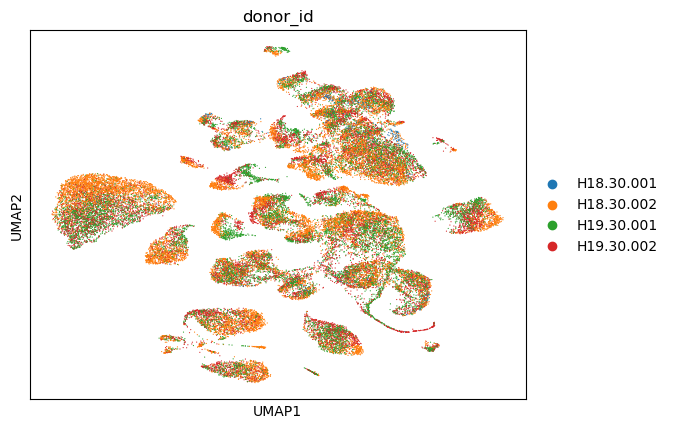

In [75]:
dpm.neighbor_umap(adata, use_rep = 'encoded', plot=True, color = ['supercluster_term'])

In [71]:
pdata = dpm.pipeline('subchunk1_1.h5ad')

/Users/fredrikstrom/anaconda3/envs/scRNA/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


/Users/fredrikstrom/anaconda3/envs/scRNA/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/fredrikstrom/anaconda3/envs/scRNA/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


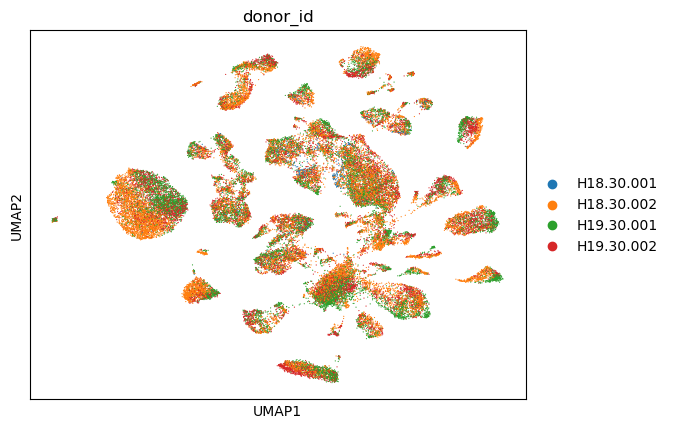

In [74]:
dpm.neighbor_umap(pdata, use_rep = 'X_pca', plot=True, color = ['supercluster_term'])

In [39]:
model.BasicNeuralNetwork(adata.var['Gene'],adata.obs['supercluster_term'].cat.categories)

BasicNeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=59480, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=512, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Linear(in_features=512, out_features=31, bias=True)
    (12): Sigmoid()
  )
)

In [2]:
adata = sc.read_h5ad("subchunk1_1.h5ad")
bdata = sc.read_h5ad("thalamic_complex24327.h5ad")
print(adata.shape)
print(bdata.shape)

(42115, 59480)
(24327, 59357)


In [7]:
cdata = sc.read_h5ad('unknown.h5ad')

In [24]:
set(sorted(cdata.var['gene_name']))

{'Synpr',
 'Lrat',
 'Tshz2',
 'Cdh20',
 'D430036J16Rik',
 'Tmem215',
 'A730046J19Rik',
 'Greb1',
 'Rasgrp2',
 'Trabd2b',
 'Vit',
 'Slc30a3',
 'Cd44',
 'Palld',
 'Prom1',
 'Sh3rf2',
 'Irx5',
 'Otx2',
 'Smoc2',
 'Igfbp4',
 'Trpc5',
 'Lhx6',
 'Gxylt2',
 'Ntn1',
 'Cngb3',
 'Slit2',
 'Mmel1',
 'Itgad',
 'C230014O12Rik',
 'Adad1',
 'Dlx1as',
 'Pla2g7',
 'Dlx6',
 'Adamts16',
 'Cnmd',
 'Emx2os',
 'Ermn',
 'Smpdl3b',
 'Unc13c',
 'Plscr4',
 'Cckar',
 'Pim1',
 'Syt6',
 'Elfn1',
 'Slc18a2',
 'Cntnap3',
 'Col26a1',
 'Hmx2',
 'Crhbp',
 'Pou3f3',
 'Kcnh3',
 'Vegfc',
 'Sox14',
 'Kcnj4',
 'Zic1',
 'Gzmk',
 'Lama4',
 'Pdzrn3',
 'Kcnip1',
 'Ccdc141',
 'Ets1',
 'Gja1',
 'Matn2',
 'Nhlh2',
 'Chrna6',
 'Robo3',
 'Sema5b',
 'Otp',
 'Scn5a',
 'Ramp3',
 'Lsp1',
 'Apex1',
 'Casr',
 'Epha4',
 'Adam18',
 'Klk8',
 'Ntng1',
 'Adamts9',
 'Ret',
 'Slitrk6',
 'St14',
 'Mrpl16',
 'Bmpr1b',
 'Gabre',
 'Coro6',
 'Drd1',
 'Fgf1',
 '4921539H07Rik',
 'Npr3',
 'Ppp1r1b',
 'Tafa1',
 '4930509J09Rik',
 'Stac2',
 'Kcng1',
 '4930

In [30]:
set(sorted(adata.var['Gene'])).intersection(set(sorted(cdata.var['gene_name'])))

{'C7'}

In [5]:
bdata

AnnData object with n_obs × n_vars = 24327 × 59357
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'

In [9]:
bdata.obs['cell_type_ontology_term_id']

CellID
10X389_6:CTCAACCCAGAGTAAT    CL:0000540
10X389_5:TATATCCCATACACCA    CL:0000540
10X377_1:CGCGTGAAGCAACCAG    CL:0000540
10X377_2:CAACCTCCAATTGCGT    CL:0000540
10X377_1:GAAATGAGTGTATACC    CL:0000540
                                ...    
10X389_5:TCGGGTGCAAGGTCAG    CL:0000738
10X389_5:TATCTGTGTATGGTTC    CL:0000738
10X389_5:GATCAGTAGAGCTTTC    CL:0000738
10X377_2:TTTATGCGTCTTCCGT    CL:0000738
10X389_5:TTCGGTCGTATCGCTA    CL:0000738
Name: cell_type_ontology_term_id, Length: 24327, dtype: category
Categories (11, object): ['CL:0000057', 'CL:0000065', 'CL:0000115', 'CL:0000127', ..., 'CL:0000669', 'CL:0000738', 'CL:0000878', 'CL:0002453']

In [3]:
cdata = sc.read_h5ad('data_chunk1.h5ad')

KeyboardInterrupt: 

In [21]:
import Encoder

In [22]:
from importlib import reload

In [35]:
reload(Encoder)

<module 'Encoder' from '/Users/jdfld/Documents/Programmering/KEX/Encoder.py'>

In [36]:
autoencoder = Encoder.Encoder(bdata.var['Gene'])

In [6]:
import torch

In [37]:
type(bdata.X)

scipy.sparse._csr.csr_matrix

In [38]:
i = 0
for j in range(bdata.X.shape[0]):
    a = bdata.X[j].toarray()
    print(max(a))
    print(a.shape)
    i += 1
    if i == 5:
        break

[1. 1. 1. ... 0. 0. 0.]
(1, 59357)
[0. 0. 0. ... 0. 0. 0.]
(1, 59357)
[0. 0. 0. ... 0. 0. 0.]
(1, 59357)
[0. 0. 0. ... 0. 0. 0.]
(1, 59357)
[0. 0. 0. ... 0. 0. 0.]
(1, 59357)


In [39]:
optimizer = torch.optim.Adam(autoencoder.parameters(),lr=autoencoder.lr,weight_decay=1e-5)
criterion = torch.nn.MSELoss()

In [40]:
Encoder.Encoder.train(data=bdata.X,model = autoencoder,optimizer=optimizer,criterion=criterion,epochs=10)

w
w
w
w
Epoch:1, Loss:0.2638
w
w
w
w
Epoch:2, Loss:0.2626
w
w
w
w
Epoch:3, Loss:0.2600
w
w
w
w
Epoch:4, Loss:0.2546
w
w
w
w
Epoch:5, Loss:0.2504
w
w
w
w
Epoch:6, Loss:0.2416
w
w
w
w
Epoch:7, Loss:0.2326
w
w
w
w
Epoch:8, Loss:0.2204
w
w
w
w
Epoch:9, Loss:0.2067
w
w
w
w
Epoch:10, Loss:0.1918


In [13]:
cdata.var

""
Accession
Cas9
EGFP
ENSG00000000003.15
ENSG00000000005.6
ENSG00000000419.13
...
pCS-Cherry-DEST_101-850
pCS-Cre2_51-1150
pET-mOrange


In [8]:
adata.var

""
Accession
Cas9
EGFP
ENSG00000000003.15
ENSG00000000005.6
ENSG00000000419.13
...
pCS-Cherry-DEST_101-850
pCS-Cre2_51-1150
pET-mOrange


In [6]:
bdata.var

,Biotype,Chromosome,End,Gene,Start,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ensembl_ids,,,,,,,,,,
ENSG00000235615,n/a,chr2,131979873,AJ239322.1,131964731,False,AJ239322.1,NCBITaxon:9606,gene,2209
ENSG00000262185,n/a,chr16,3950586,LINC02861,3930806,False,LINC02861,NCBITaxon:9606,gene,2721
ENSG00000228669,n/a,chr13,62796714,LINC00448,62672285,False,LINC00448,NCBITaxon:9606,gene,1637
ENSG00000287243,n/a,chr12,3492819,THCAT155,3483714,False,THCAT155,NCBITaxon:9606,gene,6521
ENSG00000072163,n/a,chr2,127681786,LIMS2,127638381,False,LIMS2,NCBITaxon:9606,gene,8731
...,...,...,...,...,...,...,...,...,...,...
ENSG00000261490,n/a,chr4,10073019,AC005674.2,10068089,False,RP11-448G15.3,NCBITaxon:9606,gene,3510
ENSG00000183977,n/a,chr3,20012267,PP2D1,19979961,False,PP2D1,NCBITaxon:9606,gene,2494
ENSG00000271425,n/a,chr1,146229000,NBPF10,146064711,False,NBPF10,NCBITaxon:9606,gene,14362
